In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import openai

with open('.env') as f:
    openai.api_key = f.read().strip().split('=')[1]
    
with open('data/USA.txt') as f:
    usa_anthem = [line.strip() for line in f.readlines() if line.strip() != ""]

In [16]:
response = openai.Embedding.create(
    input=usa_anthem,
    model="text-embedding-ada-002"
)

In [18]:
response.keys()

dict_keys(['object', 'data', 'model', 'usage'])

In [91]:
embeddings = np.asarray([e.embedding for e in response['data']])
normed_embeddings = embeddings - embeddings.mean(axis=0)[None,:]
normed_embeddings = normed_embeddings / embeddings.std(axis=0)[None,:]

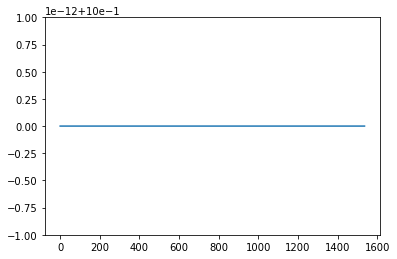

In [93]:
plt.plot(normed_embeddings.std(axis=0))

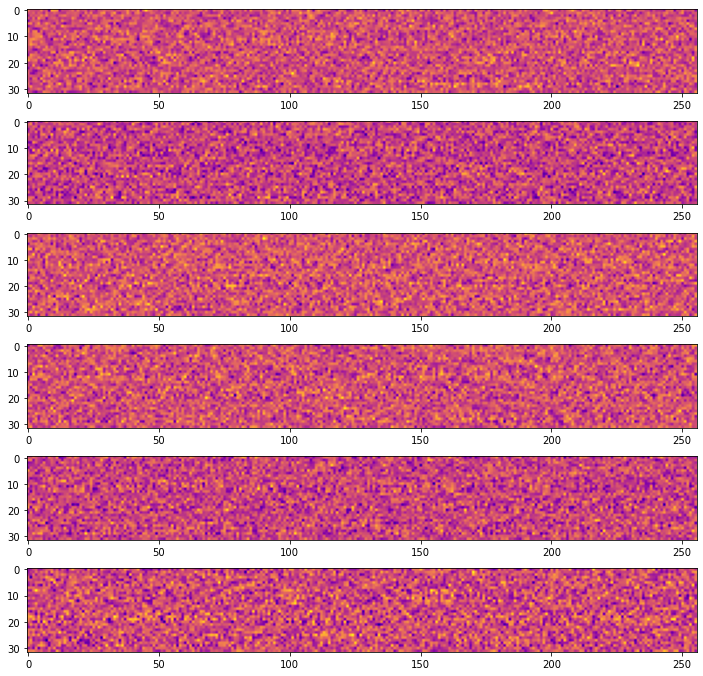

In [94]:
fig, axes = plt.subplots(6, 1, figsize=(12,12))

for i in range(6):
    axes[i].imshow(normed_embeddings[:, 256*i:256*(i+1)], cmap='plasma')